# 長方形詰込み問題

In [117]:
#モジュールの読み込み
import matplotlib.pyplot as plt
from matplotlib import patches
import math
import numpy as np
import random
%matplotlib inline

In [118]:
#数値設定
#seed値
seed = 1
#長方形の数
block_num = 10
#横縦
W = 4
H = 4
#生成する長方形の大きさ
R = 2
#ランダムな値を決める
np.random.seed(seed)
random.seed(seed)
random_num_lst = np.random.uniform(low=0.5, high=R, size=block_num*2).tolist()
#縦と横の長さのリスト
wh = np.array_split(random_num_lst, block_num)
print(wh)

[array([1.12553301, 1.58048674]), array([0.50017156, 0.95349886]), array([0.72013384, 0.63850789]), array([0.77939032, 1.01834109]), array([1.09515121, 1.3082251 ]), array([1.12879177, 1.52782925]), array([0.80667837, 1.81717615]), array([0.54108139, 1.50570127]), array([1.1259572 , 1.33803474]), array([0.71058041, 0.79715223])]


In [129]:
#色と長方形を並べる
def Rect(x,y):
    random.seed(seed)
    #Axesオブジェクト生成
    fig, ax = plt.subplots(figsize=(W,H))
    ax.set_xticks([0, W])
    ax.set_yticks([0, H])
    ax.grid()
    #色をランダムに決めて、num_lstと座標から長方形を配置
    for i in range(block_num):
        colors=["#"+''.join([random.choice('0123456789ABCDEF')for j in range(6)])for k in range(block_num)]
        r = patches.Rectangle( xy=(x[i],y[i]) , width=wh[i][0], height=wh[i][1], color=colors[i])
        ax.add_patch(r)

In [1]:
def bottom_left(lst):
    #図形の底に配置
    bottom = 0
    x = [0]
    y = [0]
    for i in range(block_num):
        bottom += lst[i][0]
        if bottom<=W:
            x.append(bottom)
            y.append(0)
        else:
            x.remove(bottom-lst[i][0])
            y.remove(0)
            stop = len(x)
            break

    #図形のうちtopが最も低いところに配置ただし、自身のwよりも狭い場合は、一番左へ
    minimum=[]
    for i in range(stop):
        minimum.append(float(lst[i][1]))
    minimum_sorted = sorted(minimum)
    j = minimum.index(minimum_sorted[0])
    k = minimum.index(minimum_sorted[1])
    if lst[stop][0]<=lst[j][1]:
        x.append(lst[j][1])
        y.append(lst[j-1][0])
    elif lst[stop][0]<=lst[k][1]:
        x.append(lst[k-1][0])
        y.append(lst[k][1])
    else:
        x.append(0)
        y.append(lst[0][1])
    return x,y

In [ ]:
def overlap(x,y):
    

IndexError: list index out of range

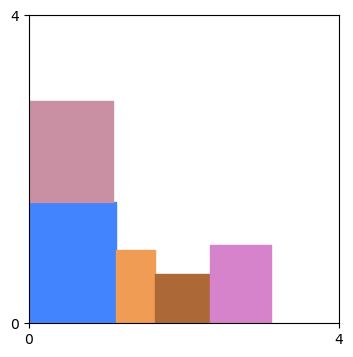

In [140]:
x,y=bottom_left(wh)
Rect(x,y)
#図形を描画
plt.show()

In [ ]:
#class Rect:
    def __init__(self, x, y, w, h):
        self.x1 = x
        self.y1 = y
        self.x2 = x + w
        self.y2 = y + h
        self.w = w
        self.h = h

    def overlap(self, b):
        return max(self.x1, b.x1) < min(self.x2, b.x2) and max(self.y1, b.y1) < min(self.y2, b.y2)

    def subtract_by(self, b):
        if self.overlap(b):
            rooms = []
        if (self.x1 < b.x1 and b.x1 < self.x2) and max(self.y1, b.y1) < min(self.y2, b.y2):
            rooms.append(Rect(self.x1, self.y1, b.x1 - self.x1, self.h))

        if (self.x1 < b.x2 and b.x2 < self.x2) and max(self.y1, b.y1) < min(self.y2, b.y2):
            rooms.append(Rect(b.x2, self.y1, self.x2 - b.x2, self.h))

        if (self.y1 < b.y1 and b.y1 < self.y2) and max(self.x1, b.x1) < min(self.x2, b.x2) :
            rooms.append(Rect(self.x1, self.y1, self.w, b.y1 - self.y1))

        if (self.y1 < b.y2 and b.y2 < self.y2) and max(self.x1, b.x1) < min(self.x2, b.x2) :
            rooms.append(Rect(self.x1, b.y2, self.w, self.y2 - b.y2))
            return rooms

        else:
            return [self]

def include(self, b):
    return self.x1 <= b.x1 and b.x2 <= self.x2 and self.y1 <= b.y1 and b.y2 <= self.y2

def larger_than(self, w, h):
    # 座標は関係なく、図形として入るかどうか
    return w <= self.w and h <= self.h

def __str__(self):
    return "({}, {}, {}, {})".format(self.x1, self.y1, self.w, self.h)

In [ ]:
def put_rect(input_rects, roomsORIG=[Rect(0, 0, 1024, 10000)]):
    rects = []
    uniq_rooms = list(roomsORIG)
    for input_rect in input_rects:
    for i in range(len(uniq_rooms)):
        room = uniq_rooms[i]
    if room.larger_than(input_rect[0], input_rect[1]): #このrectに配置可能
        new_rect = Rect(room.x1, room.y1, input_rect[0], input_rect[1])
        rects.append(new_rect)
        break

    # すべての空白矩形から subtractする
    new_rooms = []
    for room in uniq_rooms:
        new_rooms += room.subtract_by(new_rect)
    new_rooms = sorted(new_rooms, key=lambda x:x.y1) # 結局総当たりするので意味ないが、将来効率化を考えソート

    # 重複削除 総当たり
    uniq_rooms = []
    for r_i in new_rooms:
        include_flg = False
    for r_j in new_rooms:
        if r_i == r_j: continue
        if r_j.include(r_i):
            include_flg = True
            break
    if not include_flg:
        # print("{} は他のどれにも含まれない".format(r_i))
        uniq_rooms.append(r_i)
    # 低い順（左にある順）に並び替え
    new_rooms = sorted(new_rooms, key=lambda a:a.x1)
    uniq_rooms = sorted(new_rooms, key=lambda a:a.y1)

return (rects, uniq_rooms)



img_list = [(300, 350), (200, 300), (400, 400), (150, 250), (250, 400)]
rects, rooms = put_rect(img_list, roomsORIG=[Rect(0,0,1024,10000)])
for rect in rects:
    print(rect)